In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
PATH_TO_TRAIN_DATA = 'gdrive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [ ]:
import pandas as pd

df = pd.read_csv(PATH_TO_TRAIN_DATA)

In [ ]:
churn_map = {"Yes":1, "No":0}
df["Churn"] = df["Churn"].map(churn_map)

In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.dropna(inplace = True)
#Remove customer IDs from the data set
df = df.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


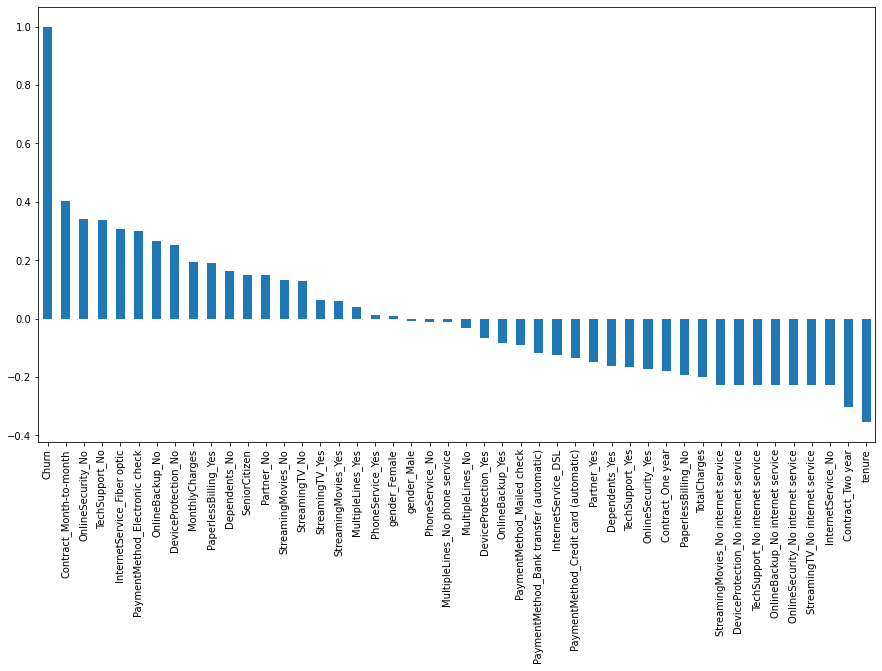

In [ ]:
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])


# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler

features = X.columns.values

scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)

X = pd.DataFrame(scaler.transform(X))

X.columns = features

In [ ]:
X.shape, y.shape

((7032, 45), (7032,))

In [ ]:
from collections import Counter

counter = Counter(y)
print(counter)
print(counter[1]/counter[0])

Counter({0: 5163, 1: 1869})
0.36199883788495063


In [ ]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4922, 45), (2110, 45), (4922,), (2110,))

In [ ]:
counter = Counter(y_train)
print(counter)
print(counter[1]/counter[0])

Counter({0: 3614, 1: 1308})
0.3619258439402324


In [ ]:
counter = Counter(y_test)
print(counter)
print(counter[1]/counter[0])

Counter({0: 1549, 1: 561})
0.3621691413815365


In [ ]:
import imblearn
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE

print(imblearn.__version__)

0.4.3


In [ ]:
!pip install prince

In [ ]:
from matplotlib import pyplot
from numpy import where

import pandas as pd
import seaborn as sns
import prince

import numpy as np

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def pca_processing(your_data):
  pca = PCA(n_components=2)
  pc = pca.fit_transform(your_data)
  pdf = np.array(pc)
  return pdf


def tsne_processing(your_data):
  tsne = TSNE(n_components=2, perplexity=50)
  tsne_representation = tsne.fit_transform(your_data)
  pdf = np.array(tsne_representation)
  return pdf


def pca_plot(X_data, y_data):
  counter = Counter(y_data)
  for label, _ in counter.items():
    row_ix = where(y_data == label)[0]
    pyplot.scatter(X_data[row_ix, 0], X_data[row_ix, 1], label=str(label),
                   alpha=0.5)
  pyplot.legend()
  pyplot.show()

In [ ]:
X_train.shape, y_train.shape

((4922, 45), (4922,))

In [ ]:
# Train X Without Algos PCA prince

pca = prince.PCA(n_components = 2, n_iter = 3)

pca.fit(X_train)
mpg_pca = pca.transform(X_train)
mpg_pca = np.array(mpg_pca)

print(mpg_pca.shape, y_train.shape)
# pca_plot(mpg_pca, y_train_PCA)

(4922, 2) (4922,)


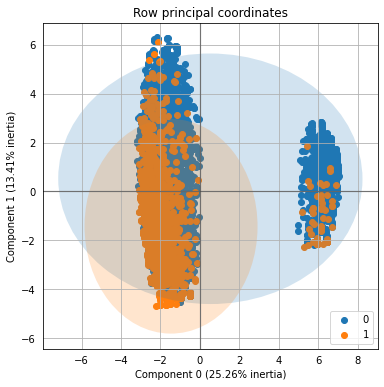

In [ ]:
ax = pca.plot_row_coordinates(X_train, 
     color_labels=y_train)

In [ ]:
ax.set_title('Несбалансированный тренировочный датасет')

Text(0.5, 1.0, 'Несбалансированный тренировочный датасет')

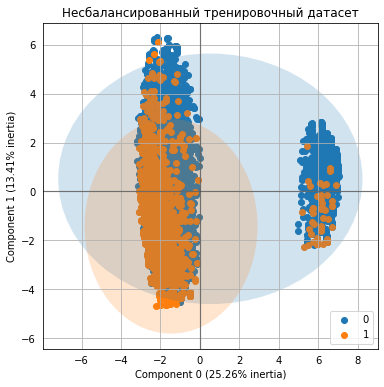

In [ ]:
ax.figure 

In [ ]:
pca.explained_inertia_

array([0.25256067, 0.13406884])

In [ ]:
# Train X SMOTE PCA prince

pca = prince.PCA(n_components = 2, n_iter = 3)

oversample = SMOTE()

X_train_prince_smote, y_train_prince_smote = oversample.fit_resample(X_train, y_train)

pca.fit(X_train_prince_smote)
mpg_pca = pca.transform(X_train_prince_smote)
mpg_pca = np.array(mpg_pca)

print(mpg_pca.shape, y_train_prince_smote.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(7228, 2) (7228,)


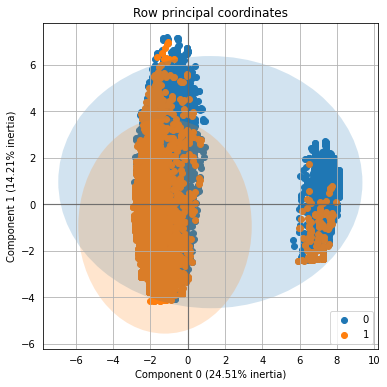

In [ ]:
ax = pca.plot_row_coordinates(X_train_prince_smote, 
     color_labels=y_train_prince_smote)

In [ ]:
pca.explained_inertia_

array([0.24514838, 0.14207456])

In [ ]:
# Train X ADASYN PCA prince

pca = prince.PCA(n_components = 2, n_iter = 3)

oversample = ADASYN()

X_train_prince_adasyn, y_train_prince_adasyn = oversample.fit_resample(X_train, y_train)

pca.fit(X_train_prince_adasyn)
mpg_pca = pca.transform(X_train_prince_adasyn)
mpg_pca = np.array(mpg_pca)

print(mpg_pca.shape, y_train_prince_adasyn.shape)
# pca_plot(mpg_pca, y_train_prince_adasyn)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(7242, 2) (7242,)


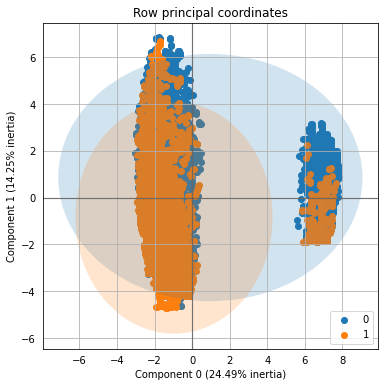

In [ ]:
ax = pca.plot_row_coordinates(X_train_prince_adasyn, 
     color_labels=y_train_prince_adasyn)

In [ ]:
pca.explained_inertia_

array([0.24490953, 0.14251795])

In [ ]:
#RandomOverSampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()

X_train_ros, y_train_ros = oversample.fit_resample(X_train, y_train)

pca = prince.PCA(n_components = 2, n_iter = 3)
pca.fit(X_train_ros)
mpg_pca = pca.transform(X_train_ros)
mpg_pca = np.array(mpg_pca)

print(mpg_pca.shape, y_train_ros.shape)

(7228, 2) (7228,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


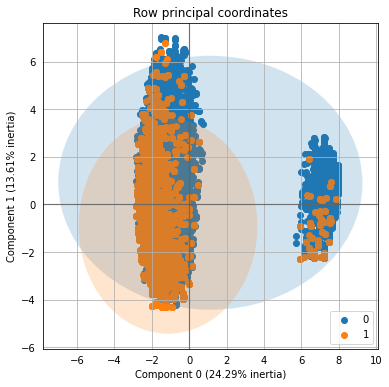

In [ ]:
ax = pca.plot_row_coordinates(X_train_ros, 
     color_labels=y_train_ros)

In [ ]:
#RandomUnderSampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler()

X_train_rus, y_train_rus = undersample.fit_resample(X_train, y_train)

pca = prince.PCA(n_components = 2, n_iter = 3)
pca.fit(X_train_rus)
mpg_pca = pca.transform(X_train_rus)
mpg_pca = np.array(mpg_pca)

print(mpg_pca.shape, y_train_rus.shape)

(2616, 2) (2616,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


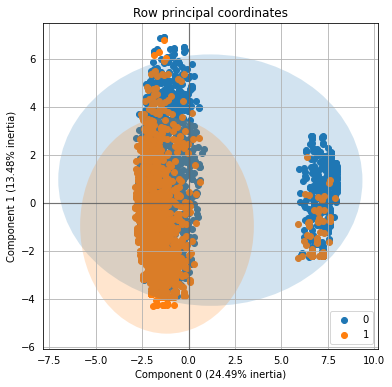

In [ ]:
ax = pca.plot_row_coordinates(X_train_rus, 
     color_labels=y_train_rus)

In [ ]:
#SMOTE BorderLine

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
oversample = BorderlineSMOTE()

X_train_ros, y_train_ros = oversample.fit_resample(X_train, y_train)

pca = prince.PCA(n_components = 2, n_iter = 3)
pca.fit(X_train_ros)
mpg_pca = pca.transform(X_train_ros)
mpg_pca = np.array(mpg_pca)

print(mpg_pca.shape, y_train_ros.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(7228, 2) (7228,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


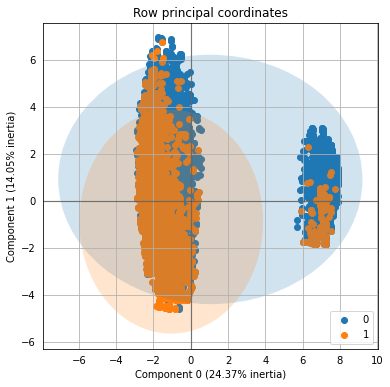

In [ ]:
ax = pca.plot_row_coordinates(X_train_ros, 
     color_labels=y_train_ros)

In [ ]:
#SMOTE ENN

In [ ]:
from imblearn.combine import SMOTEENN
oversample = SMOTEENN()

X_train_ros, y_train_ros = oversample.fit_resample(X_train, y_train)

pca = prince.PCA(n_components = 2, n_iter = 3)
pca.fit(X_train_ros)
mpg_pca = pca.transform(X_train_ros)
mpg_pca = np.array(mpg_pca)

print(mpg_pca.shape, y_train_ros.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(4392, 2) (4392,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


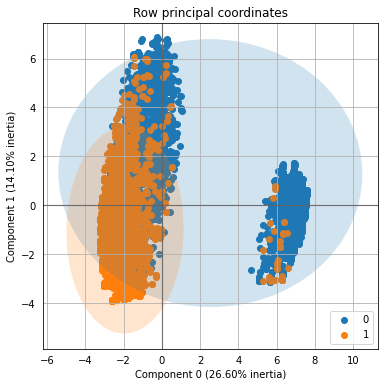

In [ ]:
ax = pca.plot_row_coordinates(X_train_ros, 
     color_labels=y_train_ros)

In [ ]:
#SMOTE TOMEK

In [ ]:
from imblearn.combine import SMOTETomek
oversample = SMOTETomek()

X_train_ros, y_train_ros = oversample.fit_resample(X_train, y_train)

pca = prince.PCA(n_components = 2, n_iter = 3)
pca.fit(X_train_ros)
mpg_pca = pca.transform(X_train_ros)
mpg_pca = np.array(mpg_pca)

print(mpg_pca.shape, y_train_ros.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(6828, 2) (6828,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


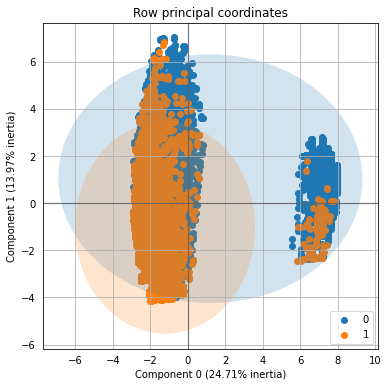

In [ ]:
ax = pca.plot_row_coordinates(X_train_ros, 
     color_labels=y_train_ros)

In [ ]:
##################################################################################################################################
##################################################################################################################################
##################################################################################################################################

In [ ]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE

X_sample, y_sample = make_classification(n_samples=1000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.9], flip_y=0, random_state=1)

counter = Counter(y_sample)
print(counter)

Counter({0: 901, 1: 99})


(1000, 2) (1000,)


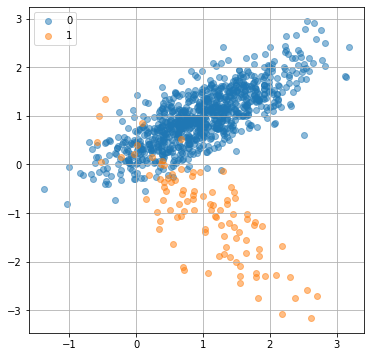

In [ ]:
#Deafault
print(X_sample.shape, y_sample.shape)
plt.figure(figsize=(6, 6))
plt.grid()
pca_plot(X_sample, y_sample)

(1802, 2) (1802,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


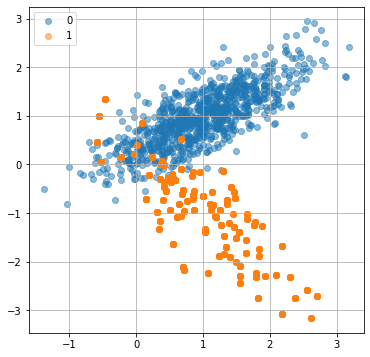

In [ ]:
#ROS
ROS = RandomOverSampler()
X_ros, y_ros = ROS.fit_resample(X_sample, y_sample)
print(X_ros.shape, y_ros.shape)
plt.figure(figsize=(6, 6))
plt.grid()
pca_plot(X_ros, y_ros)

(198, 2) (198,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


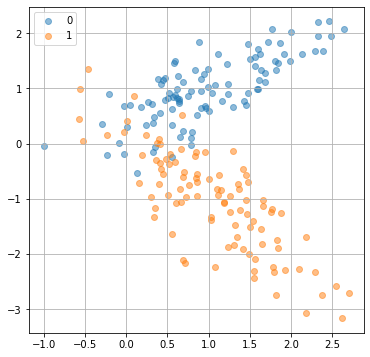

In [ ]:
#RUS
RUS = RandomUnderSampler()
X_rus, y_rus = RUS.fit_resample(X_sample, y_sample)
print(X_rus.shape, y_rus.shape)
plt.figure(figsize=(6, 6))
plt.grid()
pca_plot(X_rus, y_rus)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(1802, 2) (1802,)


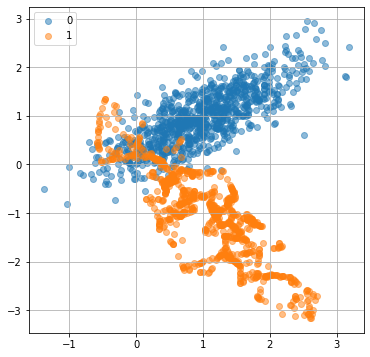

In [ ]:
#SMOTE
ROS = SMOTE()
X_ros, y_ros = ROS.fit_resample(X_sample, y_sample)
print(X_ros.shape, y_ros.shape)
plt.figure(figsize=(6, 6))
plt.grid()
pca_plot(X_ros, y_ros)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(1810, 2) (1810,)


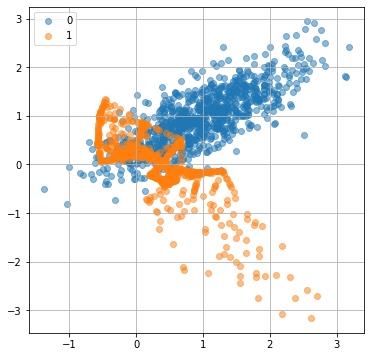

In [ ]:
#ADASYN
ROS = ADASYN()
X_ros, y_ros = ROS.fit_resample(X_sample, y_sample)
print(X_ros.shape, y_ros.shape)
plt.figure(figsize=(6, 6))
plt.grid()
pca_plot(X_ros, y_ros)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(1802, 2) (1802,)


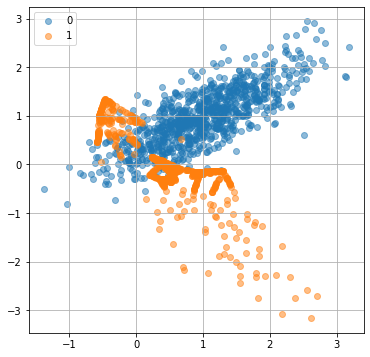

In [ ]:
#SMOTE BorderLine
ROS = BorderlineSMOTE()
X_ros, y_ros = ROS.fit_resample(X_sample, y_sample)
print(X_ros.shape, y_ros.shape)
plt.figure(figsize=(6, 6))
plt.grid()
pca_plot(X_ros, y_ros)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

(1628, 2) (1628,)


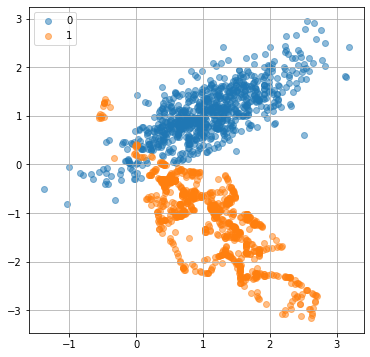

In [ ]:
#SMOTE ENN
ROS = SMOTEENN()
X_ros, y_ros = ROS.fit_resample(X_sample, y_sample)
print(X_ros.shape, y_ros.shape)
plt.figure(figsize=(6, 6))
plt.grid()
pca_plot(X_ros, y_ros)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(1758, 2) (1758,)


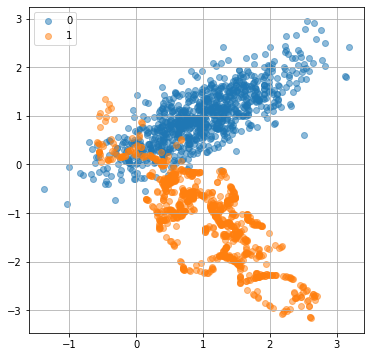

In [ ]:
#SMOTE TOMEK
ROS = SMOTETomek()
X_ros, y_ros = ROS.fit_resample(X_sample, y_sample)
print(X_ros.shape, y_ros.shape)
plt.figure(figsize=(6, 6))
plt.grid()
pca_plot(X_ros, y_ros)

In [ ]:
##################################################################################################################################
##################################################################################################################################
##################################################################################################################################

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn', axis=1), df['Churn'], test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((4922, 19), (2110, 19), (4922,), (2110,))

In [ ]:
# Train X Without Algos FAMD prince

from prince import FAMD
famd = FAMD(n_components =2, n_iter = 3, random_state = 101)

famd.fit(X_train)
X_train_famd = famd.transform(X_train)
X_train_famd = np.array(X_train_famd)

print(X_train_famd.shape, y_train.shape)
# pca_plot(X_train_famd, y_train)

(4922, 2) (4922,)


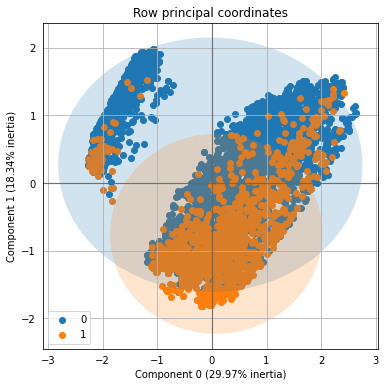

In [ ]:
ax = famd.plot_row_coordinates(X_train, 
     color_labels=y_train)

In [ ]:
famd.explained_inertia_

array([0.29968395, 0.18341605])

In [ ]:
X_train_famd.shape, y_train.shape

((4922, 2), (4922,))

In [ ]:
X_train.shape,  y_train.shape

((4922, 19), (4922,))

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
X_cat = X_train.select_dtypes(include=['object'])

In [ ]:
X_cat.shape

(4922, 15)

In [ ]:
X_enc = X_cat.copy()
X_enc = X_enc.apply(le.fit_transform)

In [ ]:
X_enc.shape

(4922, 15)

In [ ]:
X_train = X_train.drop(X_cat.columns, axis=1)

In [ ]:
X_train_enc = pd.concat([X_train,X_enc], axis=1)

In [ ]:
X_train_enc.shape

(4922, 19)

In [ ]:
X_train_enc.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3946,0,9,58.50,539.85,0,0,0,0,1,0,2,0,2,2,2,2,0,0,3
3394,0,26,61.55,1581.95,1,0,0,1,2,0,2,2,0,0,0,0,1,0,2
1635,0,3,69.95,220.45,0,0,0,1,0,0,0,0,2,0,2,2,1,1,2
4088,0,7,73.60,520.00,1,0,0,1,2,1,0,0,0,0,0,0,0,0,2
1886,0,67,60.40,3953.70,1,1,1,1,0,0,2,0,2,2,0,0,2,1,0


In [ ]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3946,Female,0,No,No,9,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,No,Mailed check,58.50,539.85
3394,Male,0,No,No,26,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,No,Electronic check,61.55,1581.95
1635,Female,0,No,No,3,Yes,No,DSL,No,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,69.95,220.45
4088,Male,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,73.60,520.00
1886,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),60.40,3953.70


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(7186, 2) (7186,)


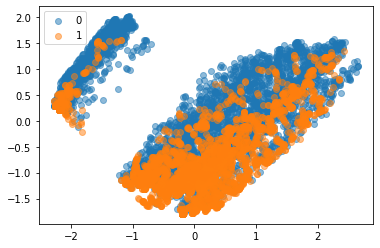

In [ ]:
# Train X SMOTE FAMD prince

oversample = SMOTE()

X_train_faid_prince_smote, y_train_faid_prince_smote = oversample.fit_resample(X_train_enc, y_train)

print(X_train_faid_prince_smote.shape, y_train_faid_prince_smote.shape)
pca_plot(X_train_faid_prince_smote, y_train_faid_prince_smote)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(7228, 2) (7228,)


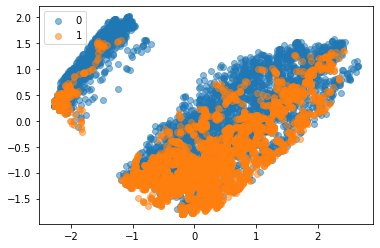

In [ ]:
# Train X ADASYN FAMD prince

oversample = ADASYN()

X_train_faid_prince_adasyn, y_train_faid_prince_adasyn = oversample.fit_resample(X_train_famd, y_train)

print(X_train_faid_prince_adasyn.shape, y_train_faid_prince_adasyn.shape)
pca_plot(X_train_faid_prince_adasyn, y_train_faid_prince_adasyn)